# 1.0 Import libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [124]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2.0 Import data

In [126]:
# Define project folder path
path = r'/Users/sharnti/Desktop/CareerFoundry/Data Immersion/Achievement 6/Project'

In [127]:
# Import runups dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'runups_clean.pkl'))

In [128]:
# Display info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17570 entries, 1 to 4582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  17570 non-null  datetime64[ns]
 1   tsunami_event_id      17570 non-null  int64         
 2   tsunami_valid         17570 non-null  int64         
 3   earthquake_magnitude  16906 non-null  float64       
 4   country               17570 non-null  object        
 5   location              17570 non-null  object        
 6   latitude              17570 non-null  float64       
 7   longitude             17570 non-null  float64       
 8   distance_source_km    17570 non-null  float64       
 9   max_water_height_m    17570 non-null  float64       
 10  flag_earthquake       17570 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 1.6+ MB


# 3.0 Data cleaning

In [130]:
# Calculate descriptive statistics
df.describe()

,date,tsunami_event_id,tsunami_valid,earthquake_magnitude,latitude,longitude,distance_source_km,max_water_height_m
count,17570,17570.000000,17570.0,16906.000000,17570.000000,17570.000000,17570.000000,17570.000000
mean,2009-10-25 23:48:31.553784832,4507.532157,4.0,8.458961,15.621313,56.601405,1867.800364,4.779530
min,1985-03-03 00:00:00,2158.000000,4.0,3.700000,-77.850000,-179.797800,0.000000,0.010000
25%,2005-03-28 00:00:00,2749.000000,4.0,7.900000,-6.679972,-71.331216,99.817089,0.472500
50%,2011-03-11 00:00:00,5413.000000,4.0,8.800000,24.984190,119.874503,189.017878,2.640000
75%,2011-03-11 00:00:00,5413.000000,4.0,9.100000,38.723556,141.469660,1648.408622,6.200000
max,2024-12-17 00:00:00,5942.000000,4.0,9.100000,72.850000,179.302000,19265.830397,200.000000
std,NaN,1384.534342,0.0,0.728547,27.490680,113.772116,3588.056345,6.718171


In [131]:
df.columns

Index(['date', 'tsunami_event_id', 'tsunami_valid', 'earthquake_magnitude',
       'country', 'location', 'latitude', 'longitude', 'distance_source_km',
       'max_water_height_m', 'flag_earthquake'],
      dtype='object')

In [132]:
df.sample(10)

,date,tsunami_event_id,tsunami_valid,earthquake_magnitude,country,location,latitude,longitude,distance_source_km,max_water_height_m,flag_earthquake
3933,2011-03-11,5413,4,9.1,JAPAN,"IWATE PREFECTURE, TOHOKU REGION",39.270219,141.917775,115.050946,9.26,Yes
1954,2018-12-11,5714,4,NaN,RUSSIA,BUREYA (118),50.563000,131.446000,1.895281,33.00,No
636,1993-07-12,2219,4,7.7,JAPAN,HABOROKO,44.367000,141.700000,263.040761,0.98,Yes
5344,2011-03-11,5413,4,9.1,JAPAN,"MIYAGI PREFECTURE, TOHOKU REGION",38.419056,141.345806,90.796619,5.08,Yes
43,2015-09-16,5590,4,8.3,CHILE,TOCOPILLA,-22.093800,-70.211700,1060.288077,0.12,Yes
2163,2010-02-27,4682,4,8.8,NEW ZEALAND,DOG ISLAND,-46.652000,168.412000,8989.526528,0.30,Yes
1289,2003-09-25,2406,4,8.3,JAPAN,SHIZUNAIGAWA,42.330556,142.367778,139.884009,0.80,Yes
6004,2011-03-11,5413,4,9.1,JAPAN,"MIYAGI PREFECTURE, TOHOKU REGION",38.416250,141.365806,89.023359,3.25,Yes
1888,2004-12-26,2439,4,9.1,MALDIVES,"KADDHOO, LAAMU",1.858000,73.519000,2503.009095,1.28,Yes
8183,2011-03-11,5413,4,9.1,JAPAN,"IBARAKI PREFECTURE, KANTO REGION",36.064472,140.618306,292.676036,3.39,Yes


## Missing values check

In [134]:
# Check for missing values
df.isnull().sum()

date                      0
tsunami_event_id          0
tsunami_valid             0
earthquake_magnitude    664
country                   0
location                  0
latitude                  0
longitude                 0
distance_source_km        0
max_water_height_m        0
flag_earthquake           0
dtype: int64

In [135]:
# Check frequency for flag_earthquake
df['flag_earthquake'].value_counts()

flag_earthquake
Yes    16906
No       664
Name: count, dtype: int64

In [136]:
# Drop any runups's that aren't associated with an earthquake
df = df[df['flag_earthquake']=='Yes']

df['flag_earthquake'].value_counts() # Check frequency for flag_earthquake

flag_earthquake
Yes    16906
Name: count, dtype: int64

In [137]:
# Check for missing values
df.isnull().sum()

date                    0
tsunami_event_id        0
tsunami_valid           0
earthquake_magnitude    0
country                 0
location                0
latitude                0
longitude               0
distance_source_km      0
max_water_height_m      0
flag_earthquake         0
dtype: int64

No missing values

## Duplicates check

In [140]:
dups = df.duplicated()

In [141]:
dups.shape # No dups

(16906,)

No duplicates

## Extreme values check

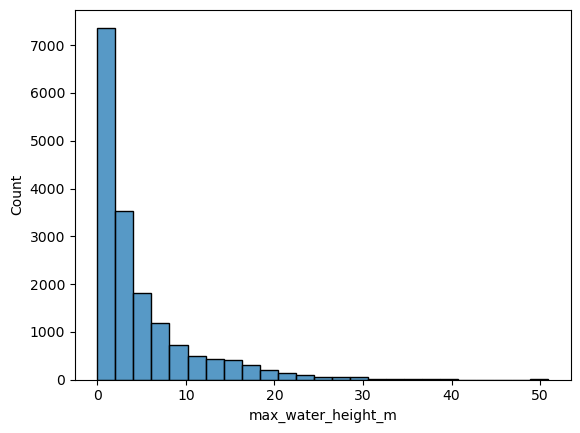

In [144]:
sns.histplot(df['max_water_height_m'], bins=25) # Shows extreme values
plt.show()

In [145]:
df['max_water_height_m'].mean() # Check the mean

4.586952561220868

In [146]:
df['max_water_height_m'].median() # Check the median

2.6

In [147]:
df['max_water_height_m'].max() # Check the max

50.9

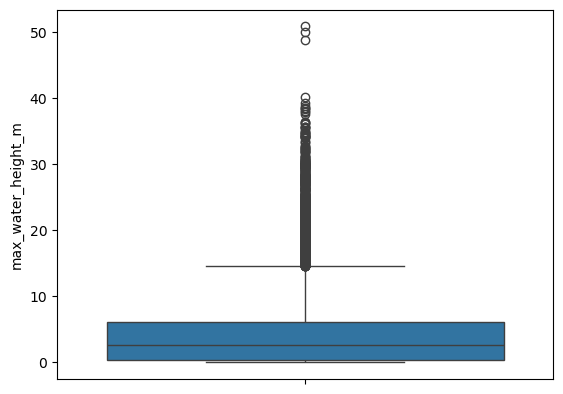

In [148]:
sns.boxplot(df['max_water_height_m'])
plt.show()

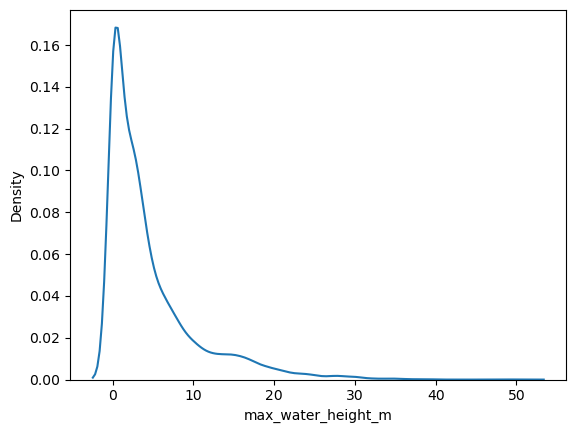

In [149]:
sns.kdeplot(df['max_water_height_m'])
plt.show()

In [150]:
upper_bound = df['max_water_height_m'].quantile(0.99)  # Top 1% as outliers
lower_bound = df['max_water_height_m'].quantile(0.01)  # Bottom 1% as outliers

In [151]:
upper_bound

26.528500000000022

**Note:** The data is right skewed, making it difficult to identify outliers. Would could use the extreme quantile method to identify and remove outliers, but as we don't want force the model to peform better, we will leave the extreme values in the dataset for the time being.

# 4.0 Data preprocessing

In [154]:
# Convert to meters and create new column
df['distance_source_m'] = df['distance_source_km'] * 1000

In [155]:
df.describe()

,date,tsunami_event_id,tsunami_valid,earthquake_magnitude,latitude,longitude,distance_source_km,max_water_height_m,distance_source_m
count,16906,16906.000000,16906.0,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,1.690600e+04
mean,2009-06-26 06:20:49.544540416,4467.017095,4.0,8.458961,16.153551,57.065636,1932.726182,4.586953,1.932726e+06
min,1985-03-03 00:00:00,2158.000000,4.0,3.700000,-77.850000,-179.797800,1.311923,0.010000,1.311923e+03
25%,2004-12-26 00:00:00,2439.000000,4.0,7.900000,-7.037278,-71.331730,106.622360,0.410000,1.066224e+05
50%,2011-03-11 00:00:00,5413.000000,4.0,8.800000,31.583000,123.029222,201.912413,2.600000,2.019124e+05
75%,2011-03-11 00:00:00,5413.000000,4.0,9.100000,38.777667,141.504771,1743.256938,6.100000,1.743257e+06
max,2024-12-17 00:00:00,5942.000000,4.0,9.100000,64.499199,179.302000,19265.830397,50.900000,1.926583e+07
std,NaN,1388.907212,0.0,0.728547,27.483563,113.823846,3634.772715,5.783741,3.634773e+06


## Select variables of interest

In [209]:
runups = df[['latitude', 'longitude', 'earthquake_magnitude', 'distance_source_m', 'max_water_height_m']].copy()

In [211]:
runups.describe()

,latitude,longitude,earthquake_magnitude,distance_source_m,max_water_height_m
count,16906.000000,16906.000000,16906.000000,1.690600e+04,16906.000000
mean,16.153551,57.065636,8.458961,1.932726e+06,4.586953
std,27.483563,113.823846,0.728547,3.634773e+06,5.783741
min,-77.850000,-179.797800,3.700000,1.311923e+03,0.010000
25%,-7.037278,-71.331730,7.900000,1.066224e+05,0.410000
50%,31.583000,123.029222,8.800000,2.019124e+05,2.600000
75%,38.777667,141.504771,9.100000,1.743257e+06,6.100000
max,64.499199,179.302000,9.100000,1.926583e+07,50.900000


In [213]:
runups.rename(columns = {'earthquake_magnitude' : 'earthquake', 'distance_source_m': 'distance', 'max_water_height_m': 'max_water'}, inplace = True)

In [215]:
runups.head()

,latitude,longitude,earthquake,distance,max_water
1,51.8630,-176.6320,8.0,1.380559e+07,0.05
3,55.3370,-160.5020,8.0,1.288900e+07,0.08
4,60.1190,-149.4270,8.0,1.250485e+07,0.03
6,-2.1833,-79.8833,8.0,3.530667e+06,0.20
7,19.7303,-155.0553,8.0,1.059667e+07,0.24


# 5.0 Model selection and evaluation

## Elbow technique

In [219]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [221]:
score = [kmeans[i].fit(runups).score(runups) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2.2334163661245254e+17,
 -4.693993187737226e+16,
 -1.99108997284958e+16,
 -1.157774407799499e+16,
 -6637602942300776.0,
 -4033921672792803.5,
 -2613907908304585.0,
 -2049528742671947.0,
 -1694055309070454.0]

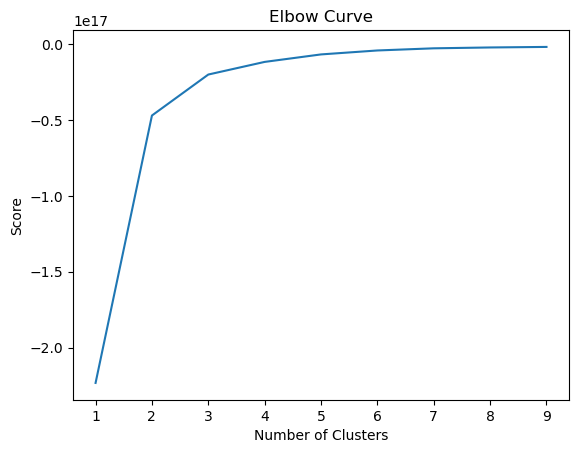

In [223]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Note:** There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for our clusters is three.

## k-means clustering

In [230]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [234]:
# Fit the k-means object to the data.

kmeans.fit(runups)

KMeans(n_clusters=3)

In [236]:
runups['clusters'] = kmeans.fit_predict(runups)

In [238]:
runups.head()

,latitude,longitude,earthquake,distance,max_water,clusters
1,51.8630,-176.6320,8.0,1.380559e+07,0.05,0
3,55.3370,-160.5020,8.0,1.288900e+07,0.08,0
4,60.1190,-149.4270,8.0,1.250485e+07,0.03,0
6,-2.1833,-79.8833,8.0,3.530667e+06,0.20,2
7,19.7303,-155.0553,8.0,1.059667e+07,0.24,0


In [240]:
runups['clusters'].value_counts()

clusters
1    13777
2     2194
0      935
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

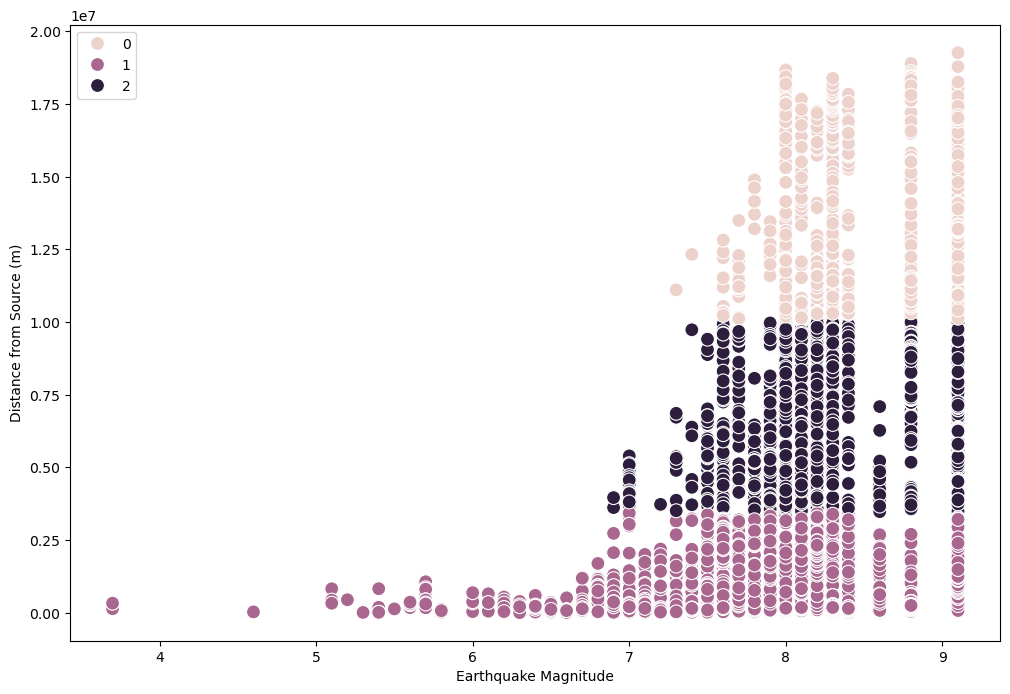

In [244]:
# Plot the clusters for the "earthquake" and "distnace" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=runups['earthquake'], y=runups['distance'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Earthquake Magnitude') # Label x-axis.
plt.ylabel('Distance from Source (m)') # Label y-axis.
plt.show()

**Observations:**
- _purple;_ this cluster has runups with a wide variation but are located close to the source. This makes sense; the closer an earthquake is to land, the less strong it would need to be to generate a tsunami runup that can reach land.
- _dark purple;_ runups in this cluster are a little further away from the source and have less variety in earthquake magnitude. Makes sense for the same logic as above.
- _pink;_ this cluster are the furtherest away from the source and have the narrowest variation in earthquake magnitude of all three clusters.

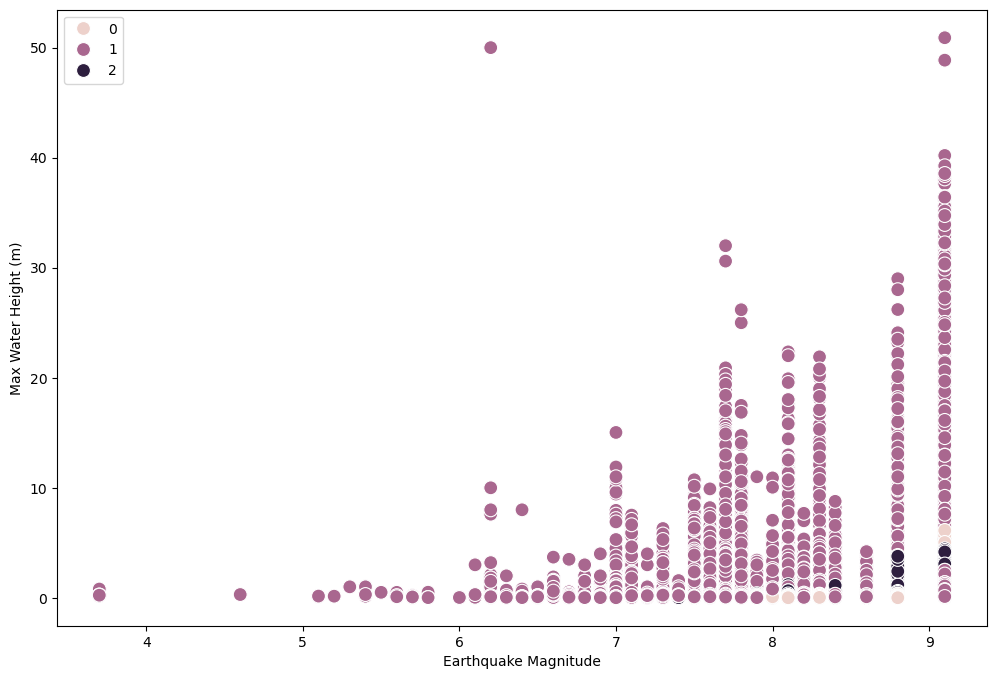

In [246]:
# Plot the clusters for the "earthquake" and "max_water" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=runups['earthquake'], y=runups['max_water'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Earthquake Magnitude') # Label x-axis.
plt.ylabel('Max Water Height (m)') # Label y-axis.
plt.show()

**Observations:**
- _purple;_ this cluster constitues most of the plot. Runups in this cluster have a wide varition in both earthquake magnitude and max water height.
- _dark purple;_ this group is hard to find, but appear to have high vlaue for earthquake magnitude but a low max water height.
- _pink;_ similar as the dark purple group.

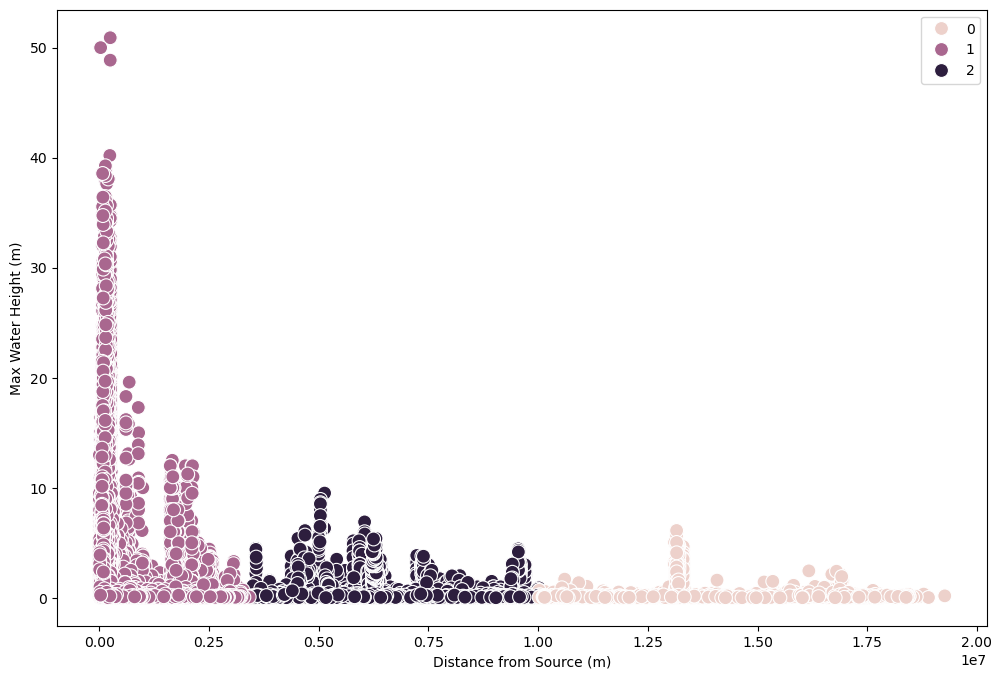

In [248]:
# Plot the clusters for the "distance" and "max_water" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=runups['distance'], y=runups['max_water'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance from Source (m)') # Label x-axis.
plt.ylabel('Max Water Height (m)') # Label y-axis.
plt.show()

**Observations:**
- _purple;_ This cluster of runups occured close to the source and have a wide variation in max water height. This is an interesting insight - perhaps the wide variety of wave heights is dependant on earthquake variation?
- _dark purple;_ this group is further away from the source and has a considerably smaller variation in max water height.
- _pink;_ these runups are the furthest from the source and have a very low variation in height (mostly below 10m).

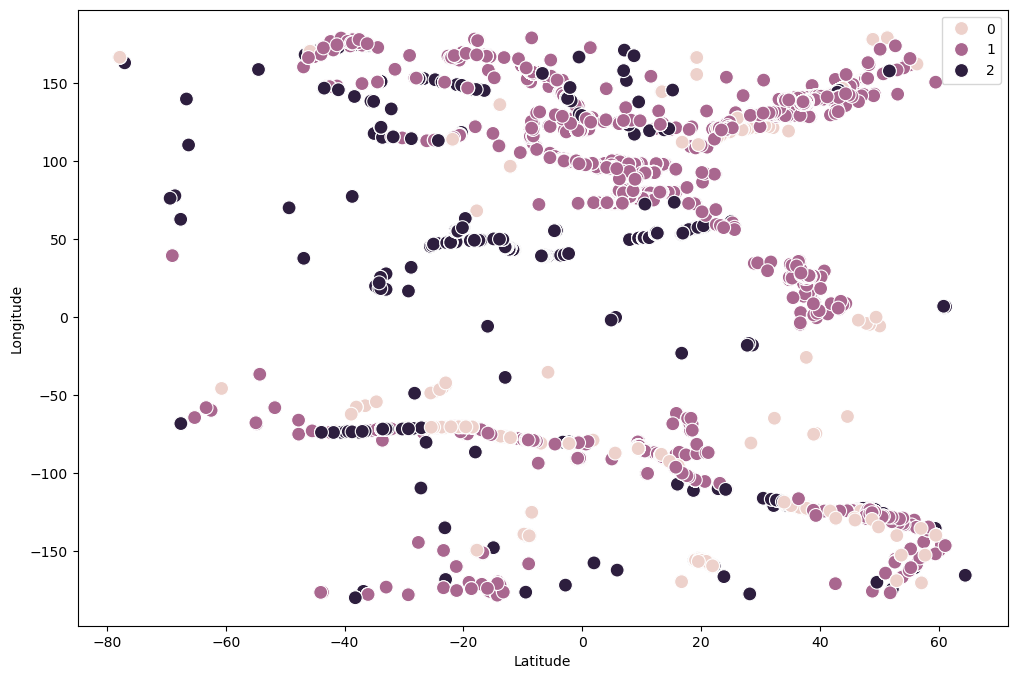

In [250]:
# Plot the clusters for the "latitude" and "longitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=runups['latitude'], y=runups['longitude'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('Longitude') # Label y-axis.
plt.show()

**Observations:**
It's difficult to observe a clear pattern here. Perhaps that's helpful in the way to say that there is no clear relationship between latitude and longitude for any clusters, which may indicate these are defining features for the clustering.

In [252]:
runups.loc[runups['clusters'] == 2, 'cluster'] = 'dark purple'
runups.loc[runups['clusters'] == 1, 'cluster'] = 'purple'
runups.loc[runups['clusters'] == 0, 'cluster'] = 'pink'

In [254]:
runups.groupby('cluster').agg({'latitude':['mean', 'median'], 
                         'longitude':['mean', 'median'], 
                         'earthquake':['mean', 'median'],
                          'distance':['mean', 'median'],
                          'max_water':['mean', 'median']})

latitude           longitude             earthquake         \
                  mean   median       mean      median       mean median   
cluster                                                                    
dark purple  11.272288  19.7303 -41.987120 -119.482495   8.481632    8.3   
pink         12.874899  19.2900 -22.303086  -80.906400   8.493583    8.3   
purple       17.153408  35.6230  78.226375  138.239160   8.453001    8.8   

                 distance               max_water         
                     mean        median      mean median  
cluster                                                   
dark purple  6.483253e+06  6.222752e+06  0.892046   0.21  
pink         1.356092e+07  1.320326e+07  0.542631   0.14  
purple       4.188831e+05  1.648922e+05  5.449845   3.34

**Observation:** The purple cluster jumps out as the most interesting to me. We can see that runups in this group are associated with:
- The highest median earthquake magnitude of any cluster (8.8).
- The lowest median value for distance (164.89 km)
- The hightest median max_water height (3.34 m).

Some interesting next steps could include:
- To use this information to classify our runups further (i.e. runups close to the source with  large wave, middle distance from the source with smaller waves etc).
- We could also use a classification algorithm to predict max water height based on earthquake magnitude and distance.